In [81]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA PREPROCESSING

In [82]:
# reading the dataset
turnv = pd.read_csv('HR-Employee-Attrition.csv', low_memory=False)
turnv.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [83]:
turnv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [84]:
#overview of the dataset variable ------- #uniques values, list of unique values, #missing values and data type 
col = turnv.columns
oview_cat = []
oview_num = []
for i in col:
  if turnv[i].dtype == "O":
    oview_cat.append([i,turnv[i].nunique(), turnv[i].drop_duplicates().values, turnv[i].isnull().sum(), turnv[i].dtype])
  else:
    oview_num.append([i,turnv[i].nunique(), turnv[i].drop_duplicates().values, turnv[i].isnull().sum(), turnv[i].dtype])

cat_overview = pd.DataFrame(oview_cat, columns = ['Features', 'Number_unique_values', 'List_unique_values', \
                                               'Missing_values_number', 'Data_type'])

num_overview = pd.DataFrame(oview_num, columns = ['Features', 'Number_unique_values', 'List_unique_values', \
                                               'Missing_values_number', 'Data_type'])

In [85]:
print ('\nThe database have %d categorical columns\n' % (len(cat_overview)))
cat_overview


The database have 9 categorical columns



,Features,Number_unique_values,List_unique_values,Missing_values_number,Data_type
0,Attrition,2,"[Yes, No]",0,object
1,BusinessTravel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]",0,object
2,Department,3,"[Sales, Research & Development, Human Resources]",0,object
3,EducationField,6,"[Life Sciences, Other, Medical, Marketing, Tec...",0,object
4,Gender,2,"[Female, Male]",0,object
5,JobRole,9,"[Sales Executive, Research Scientist, Laborato...",0,object
6,MaritalStatus,3,"[Single, Married, Divorced]",0,object
7,Over18,1,[Y],0,object
8,OverTime,2,"[Yes, No]",0,object


In [86]:
print ('\nThe database have %d numerical columns\n' % (len(num_overview)))
num_overview


The database have 26 numerical columns



,Features,Number_unique_values,List_unique_values,Missing_values_number,Data_type
0,Age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...",0,int64
1,DailyRate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...",0,int64
2,DistanceFromHome,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...",0,int64
3,Education,5,"[2, 1, 4, 3, 5]",0,int64
4,EmployeeCount,1,[1],0,int64
5,EmployeeNumber,1470,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...",0,int64
6,EnvironmentSatisfaction,4,"[2, 3, 4, 1]",0,int64
7,HourlyRate,71,"[94, 61, 92, 56, 40, 79, 81, 67, 44, 84, 49, 3...",0,int64
8,JobInvolvement,4,"[3, 2, 4, 1]",0,int64
9,JobLevel,5,"[2, 1, 3, 4, 5]",0,int64


In [87]:
#dropping useless columns, number_unique_value=1
turnv.drop(columns= ['StandardHours', 'EmployeeCount', 'Over18','EmployeeNumber'], inplace=True)
# encoding the target variable and splitting the dataset into features and response variable
turnv['Attrition'] = turnv['Attrition'].map({'Yes': 1, 'No' : 0})
X = turnv.drop('Attrition', axis = 1)
y = turnv.iloc[:,1]

In [88]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


In [89]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [90]:
# clustering columns based on dtype
num_col = X.describe().columns
all= X.columns
# turnv_num = turnv[num_col]
cat_set = set(all) - set(num_col)
# turnv_cat = turnv[cat_col]
cat_col = list(cat_set)

In [91]:
from matplotlib import style
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [92]:
plt.style.use('seaborn-white')

In [93]:
cat_col

['OverTime',
 'BusinessTravel',
 'Gender',
 'MaritalStatus',
 'EducationField',
 'Department',
 'JobRole']

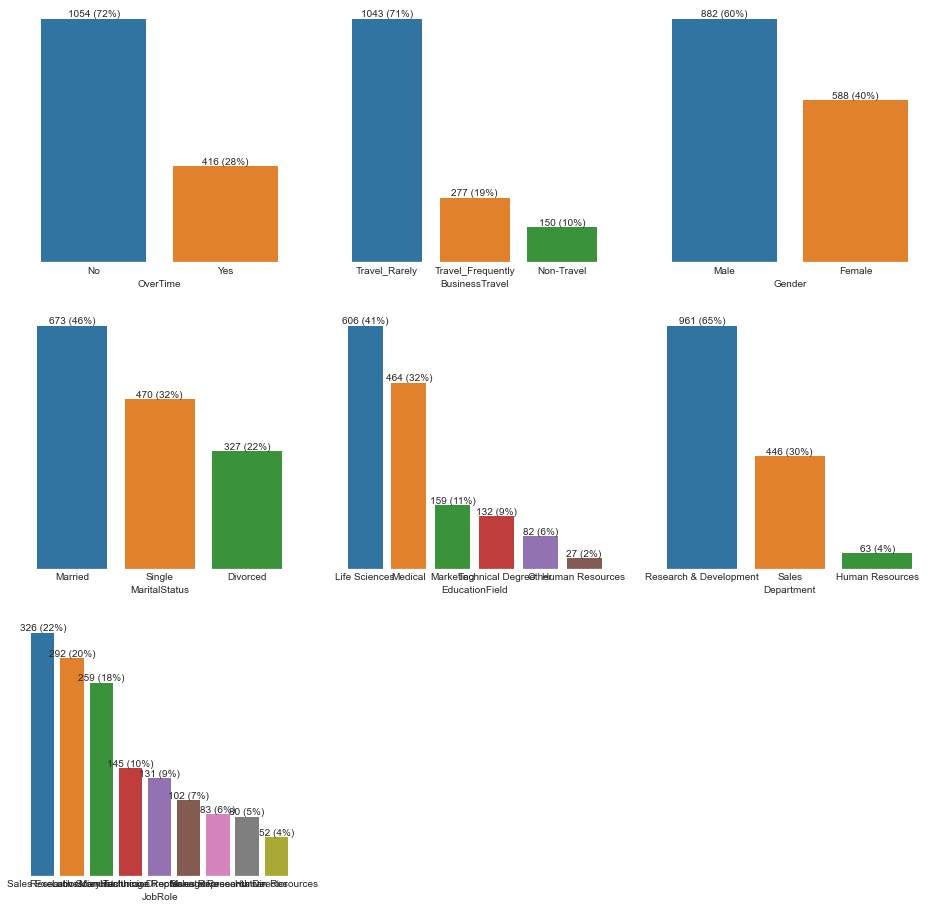

In [94]:
import seaborn as sns
plt.style.use('seaborn-white')
# countplot of all the categorical variable
df_cat=X[cat_col]
I=[]
J=[]
if df_cat.shape[1]<4:
  nrow=1
  ncol=df_cat.shape[1]
elif df_cat.shape[1]%3==0:
  nrow=df_cat.shape[1]//3
  ncol=3
else:
  nrow=round(df_cat.shape[1]//3)+1
  ncol=3
for i in range(nrow):
    for j in range(ncol):
        I.append(i)
        J.append(j)
        
fig,ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,16))
for i,j,col in zip(I,J,df_cat.columns):

    aw = sns.countplot(x=df_cat[col], order=df_cat[col].value_counts(ascending=False).index, ax=ax[i,j])

    abs_values = df_cat[col].value_counts(ascending=False)
    rel_values = df_cat[col].value_counts(ascending=False, normalize=True).values * 100

    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

    # ax[i,j].set_xticklabels(labels=df_cat[col].unique(), rotation=30)
    # ax[i,j].set_title(col)  

    aw.bar_label(container=aw.containers[0], labels=lbls)
    ax[2,1].axis('off')
    ax[2,2].axis('off')
    ax[i,j].set_yticklabels(labels=[])
    ax[i,j].set_ylabel('')
    for axis in ['top', 'bottom', 'left', 'right']:
        ax[i,j].spines[axis].set_color('white')


In [95]:
df_num.shape[1]

24

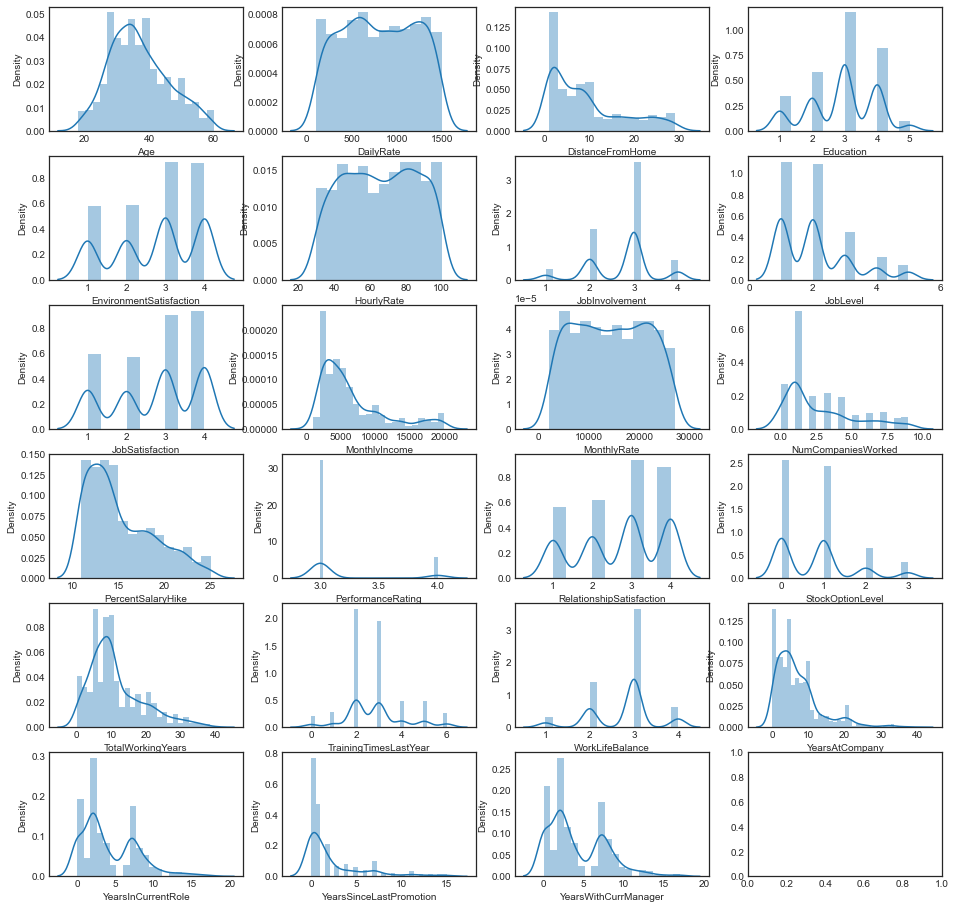

In [96]:
# distribution of the numeric columns
# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

df_num=X[num_col]
I=[]
J=[]
if df_num.shape[1]<4:
  nrow=1
  ncol=df_num.shape[1]
elif df_num.shape[1]%4==0:
  nrow=df_num.shape[1]//4
  ncol=4
else:
  nrow=round(df_num.shape[1]//4)+1
  ncol=4
for i in range(nrow):
    for j in range(ncol):
        I.append(i)
        J.append(j)
        
fig,ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,16))
for i,j,col in zip(I,J,df_num.columns):
    aw = sns.distplot(df_num[col], ax=ax[i,j])

In [140]:
# turnv["Age_bin"]=pd.cut(turnv['Age'], 4)
# turnv.head()
# turnv["Age_bin"].unique()

In [139]:
# h=[]
# def convertInterval(interval):
#     a=int(interval.left)
#     b=int(interval.right)
#     return list([a,b])
# #     b=round(interval.right)
# #     h.append(b)
# #     return h


# convertInterval(turnv["Age_bin"][0])
# turnv['Age_binn'] = turnv['Age_bin'].map(lambda x: convertInterval(x))
# turnv.head()
# # convertInterval(turnv["Age_bin"][0])

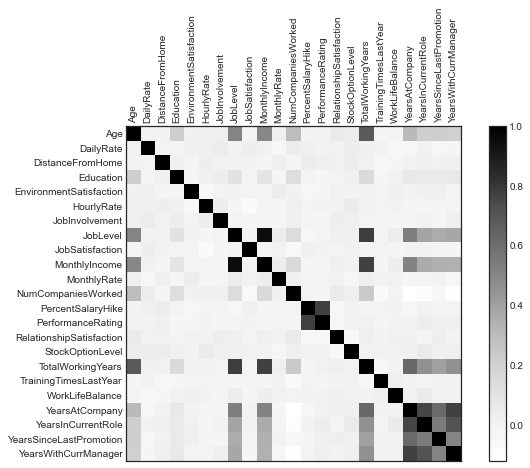

In [97]:
# checking correlation between numerical variables in a graph
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# plt.style.use('seaborn-white')
#correlation matrix
def get_corrs(df):
    numeric = df.describe().columns
    df_num = df[numeric]
    matrix = df_num.corr()
    return matrix

# plotting the matrix
def get_plot_corr(df):
  plt.figure(figsize = (10,6))
  plt.matshow(get_corrs(df), fignum=1)
  plt.colorbar()
  plt.yticks( np.arange(len(get_corrs(df).columns)), get_corrs(df).columns)
  plt.xticks(np.arange(len(get_corrs(df).columns)), get_corrs(df).columns, rotation=90)
  return plt.show()

get_plot_corr(X)

In [98]:
# checking correlation between numerical variables and retrieving correlation>0.7
def get_corr_pairs(X):
    corr_pairs = {}
    col_num = get_corrs(X).columns.to_list()
    B = []
    C = []
    for i in col_num:
        for j in list(range(len(col_num))):
            if get_corrs(X)[i][j]>0.7 and j!= col_num.index(i):
                B.append(col_num[j])
        if B != []:
          C.append(B)
          corr_pairs.update({i:C[0]})
        B = []
        C = []
    return corr_pairs

In [99]:
# variables highly correlated
get_corr_pairs(X)

{'JobLevel': ['MonthlyIncome', 'TotalWorkingYears'],
 'MonthlyIncome': ['JobLevel', 'TotalWorkingYears'],
 'PercentSalaryHike': ['PerformanceRating'],
 'PerformanceRating': ['PercentSalaryHike'],
 'TotalWorkingYears': ['JobLevel', 'MonthlyIncome'],
 'YearsAtCompany': ['YearsInCurrentRole', 'YearsWithCurrManager'],
 'YearsInCurrentRole': ['YearsAtCompany', 'YearsWithCurrManager'],
 'YearsWithCurrManager': ['YearsAtCompany', 'YearsInCurrentRole']}

(0.0, 1.0, 0.0, 1.0)

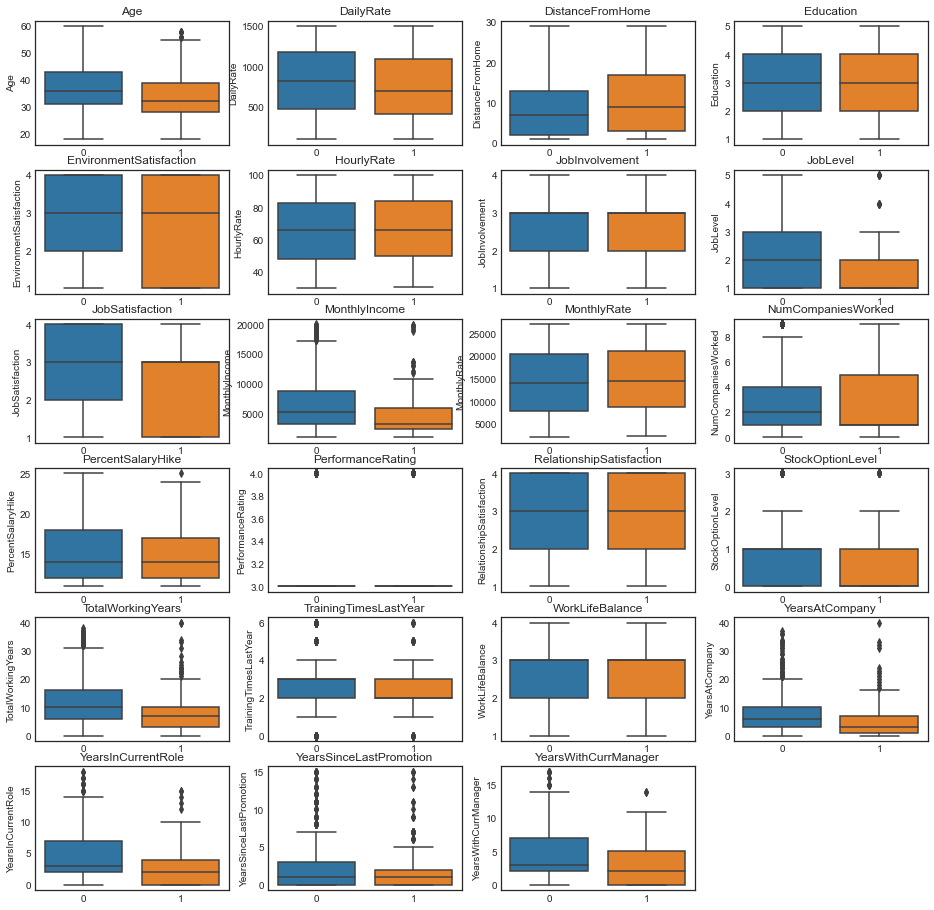

In [150]:
# boxplot to check outliers and relationship with target
df_num=X[num_col]
I=[]
J=[]
if df_num.shape[1]<4:
  nrow=1
  ncol=df_num.shape[1]
elif df_num.shape[1]%4==0:
  nrow=df_num.shape[1]//4
  ncol=4
else:
  nrow=round(df_num.shape[1]//4)+1
  ncol=4
for i in range(nrow):
    for j in range(ncol):
        I.append(i)
        J.append(j)
        
fig,ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,16))
for i,j,col in zip(I,J,df_num.columns):
    aw = sns.boxplot(data=turnv, x="Attrition", y=col, ax=ax[i,j])
    ax[i,j].set_title(col)
    ax[i,j].set_xlabel("")
#     for axis in ['top', 'bottom', 'left', 'right']:
#         ax[i,j].spines[axis].set_color('white')
#     ax[i,j].set_yticklabels(labels=[])
ax[5,3].axis("off")

In [ ]:
# correlation between the target and categorical variables --> Chi square; test of independance 
# if p<significance(0.05), Ho(the variables are independantes) is rejected

# importing required fonction
from scipy.stats import chi2_contingency

test = []
for i in cat_col:
  ct = pd.crosstab(index = y, columns = turnv[i])
  chi = chi2_contingency(ct)
  t = chi[1]<0.05
  test.append([i, chi[1], t])

df_t = pd.DataFrame(test, columns = ['Feature', 'p_value', 'Ho'])
df_t

,Feature,p_value,Ho
0,Gender,2.905724e-01,False
1,JobRole,2.752482e-15,True
2,EducationField,6.773980e-03,True
3,MaritalStatus,9.455511e-11,True
4,BusinessTravel,5.608614e-06,True
5,Department,4.525607e-03,True
6,OverTime,8.158424e-21,True


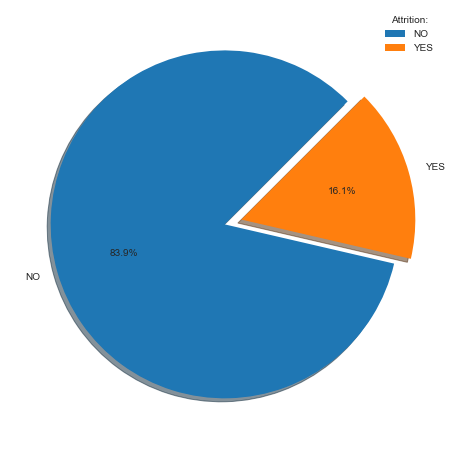

In [151]:
# imbalanced dataset
mylabels = ['NO', 'YES']
imb = turnv.Attrition.value_counts()
plt.figure(figsize=(8,8))
plt.pie(imb.tolist(), labels = mylabels, autopct='%1.1f%%',startangle=45, shadow=True,explode=[0.0,0.1])
plt.legend(title = 'Attrition:')
plt.show()

In [152]:
# dropping the columns with high correlation with others
X.drop(columns= ['JobLevel', 'YearsWithCurrManager', 'PercentSalaryHike','Gender'], inplace=True)

In [155]:
#updating columns type set
num_col = X.describe().columns
all= X.columns
# turnv_num = turnv[num_col]
cat_set = set(all) - set(num_col)
# turnv_cat = turnv[cat_col]
cat_col = list(cat_set)
len(X.columns)

26

## Classification models

### LogisticRegression/DecisionTree/RandomForest

In [158]:
#importing libraries
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.compose import ColumnTransformer
from sklearn import metrics

##### Proceeding with croos validation




In [159]:
# column transformer pipeline
Transformer = ColumnTransformer(transformers = [('std',StandardScaler(), num_col.tolist()),
                                              ('enc',OneHotEncoder(), cat_col)], remainder = 'passthrough')
Transformer.fit(X)
# definning the pipeline
model_lg = LogisticRegression(solver = 'liblinear')
model_dt = DecisionTreeClassifier(max_depth=5)
model_rf = RandomForestClassifier(n_estimators = 20)

# Defining the evaluation procedure
for model in [model_lg,model_dt,model_rf]:

  pipeline = Pipeline([('s', Transformer), ('m', model)])
  pipeline.fit(X,y)
  cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

  # Evaluating the model --> estimating the score for each KFold
  y_pred = cross_val_predict(pipeline,X, y, cv = 10)
  m_scores = cross_val_score(pipeline, X, y, scoring = 'accuracy', cv = cv, n_jobs = 1)
  cm = confusion_matrix(y, y_pred)
  # summarize the result
  print(f"\nResult for {model}\n")
  # print(m_scores)
  print('Accuracy: %.2f (%.2f)' % (mean(m_scores), std(m_scores)))
  print(cm)
  print(classification_report(y, y_pred))
  pipeline.score(X,y)
  print("Accuracy: %.3f"% (metrics.accuracy_score(y, y_pred)))
  print("-----------------------------------------------------")



Result for LogisticRegression(solver='liblinear')

Accuracy: 0.88 (0.02)
[[1199   34]
 [ 135  102]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1233
           1       0.75      0.43      0.55       237

    accuracy                           0.89      1470
   macro avg       0.82      0.70      0.74      1470
weighted avg       0.87      0.89      0.87      1470

Accuracy: 0.885
-----------------------------------------------------

Result for DecisionTreeClassifier(max_depth=5)

Accuracy: 0.83 (0.02)
[[1177   56]
 [ 168   69]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1233
           1       0.55      0.29      0.38       237

    accuracy                           0.85      1470
   macro avg       0.71      0.62      0.65      1470
weighted avg       0.82      0.85      0.83      1470

Accuracy: 0.848
-----------------------------------------------------

Result

##### Proceeding with train/test data

In [160]:
# column transformer pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1234)

Transformer = ColumnTransformer(transformers = [('std',StandardScaler(), num_col.tolist()),
                                              ('enc',OneHotEncoder(), cat_col)], remainder = 'passthrough')
# training the transformer on the training test
Transformer.fit(X_train)
# definning the pipeline
model_lg = LogisticRegression(solver = 'liblinear')
model_dt = DecisionTreeClassifier(max_depth=5)
model_rf = RandomForestClassifier(n_estimators = 20)

# Defining the evaluation procedure
for model in [model_lg,model_dt,model_rf]:

  pipeline = Pipeline([('s', Transformer), ('m', model)])
  pipeline.fit(X_train,y_train)

  # Evaluating the model --> estimating the score for each KFold
  y_pred = pipeline.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  # summarize the result
  print(f"\nResult for {model}\n")
  # print('Accuracy: %.2f (%.2f)' % (mean(m_scores), std(m_scores)))
  print(cm)
  print(classification_report(y_test, y_pred))
  # pipeline.score(X,y)
  print("Accuracy: %.3f"% (metrics.accuracy_score(y_test, y_pred)))
  print("-----------------------------------------------------")



Result for LogisticRegression(solver='liblinear')

[[364   6]
 [ 43  28]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       370
           1       0.82      0.39      0.53        71

    accuracy                           0.89       441
   macro avg       0.86      0.69      0.74       441
weighted avg       0.88      0.89      0.87       441

Accuracy: 0.889
-----------------------------------------------------

Result for DecisionTreeClassifier(max_depth=5)

[[352  18]
 [ 47  24]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       370
           1       0.57      0.34      0.42        71

    accuracy                           0.85       441
   macro avg       0.73      0.64      0.67       441
weighted avg       0.83      0.85      0.84       441

Accuracy: 0.853
-----------------------------------------------------

Result for RandomForestClassifier(n_estimators=20)

[[364 

### UNDER SAMPLING THE MAJORITY CLASS

In [178]:
turnv.drop(columns=['Age_bin', 'Age_binn'], axis=1, inplace=True)
# Splitting the data
df_class_1 = turnv[turnv['Attrition'] == 1]
df_class_0 = turnv[turnv['Attrition'] == 0]
# shuffling the data
df_class_0 = df_class_0.sample(frac=1) # class to be undersampled
n_class_0 = len(df_class_0)
n_class_1 = len(df_class_1)


In [179]:
# unsersampling to the minority class length 
df_c_0_under_spl = df_class_0.sample(n_class_1)
df_c_0_under_spl.shape, df_class_1.shape

((237, 31), (237, 31))

In [180]:
# merge the data into a unique dataset
df_under_spl = pd.concat([df_c_0_under_spl, df_class_1], axis = 0)
df_under_spl.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1079,39,0,Travel_Rarely,1089,Research & Development,6,3,Life Sciences,2,Female,...,3,4,0,9,3,3,2,0,2,2
691,40,0,Travel_Frequently,1469,Research & Development,9,4,Medical,4,Male,...,3,4,1,3,2,3,1,1,0,0
73,32,0,Travel_Rarely,548,Research & Development,1,3,Life Sciences,2,Male,...,3,2,2,10,3,3,10,4,0,9
1432,37,0,Travel_Rarely,161,Research & Development,10,3,Life Sciences,3,Female,...,4,1,1,16,2,3,16,11,6,8
1062,44,0,Travel_Frequently,1193,Research & Development,2,1,Medical,2,Male,...,3,2,0,16,2,2,2,2,2,2


In [181]:
X = df_under_spl.drop('Attrition', axis = 1)
y = df_under_spl.iloc[:,1]

In [182]:
#updating columns type set
num_col = X.describe().columns
all= X.columns
# turnv_num = turnv[num_col]
cat_set = set(all) - set(num_col)
# turnv_cat = turnv[cat_col]
cat_col = list(cat_set)
len(X.columns)

30

### Training the models with inbalanced undersampled data with cross validation

In [183]:
# column transformer pipeline
Transformer = ColumnTransformer(transformers = [('std',StandardScaler(), num_col.tolist()),
                                              ('enc',OneHotEncoder(), cat_col)], remainder = 'passthrough')
Transformer.fit(X)
# definning the pipeline
model_lg = LogisticRegression(solver = 'liblinear')
model_dt = DecisionTreeClassifier(max_depth=5)
model_rf = RandomForestClassifier(n_estimators = 20)

# Defining the evaluation procedure
for model in [model_lg,model_dt,model_rf]:

  pipeline = Pipeline([('s', Transformer), ('m', model)])
  pipeline.fit(X,y)
  cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

  # Evaluating the model --> estimating the score for each KFold
  y_pred = cross_val_predict(pipeline,X, y, cv = 10)
  m_scores = cross_val_score(pipeline, X, y, scoring = 'accuracy', cv = cv, n_jobs = 1)
  cm = confusion_matrix(y, y_pred)
  # summarize the result
  print(f"\nResult for {model}\n")
  # print(m_scores)
  print('Accuracy: %.2f (%.2f)' % (mean(m_scores), std(m_scores)))
  print(cm)
  print(classification_report(y, y_pred))
  pipeline.score(X,y)
  print("Accuracy: %.3f"% (metrics.accuracy_score(y, y_pred)))
  print("-----------------------------------------------------")


Result for LogisticRegression(solver='liblinear')

Accuracy: 0.74 (0.06)
[[180  57]
 [ 60 177]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       237
           1       0.76      0.75      0.75       237

    accuracy                           0.75       474
   macro avg       0.75      0.75      0.75       474
weighted avg       0.75      0.75      0.75       474

Accuracy: 0.753
-----------------------------------------------------

Result for DecisionTreeClassifier(max_depth=5)

Accuracy: 0.65 (0.06)
[[183  54]
 [106 131]]
              precision    recall  f1-score   support

           0       0.63      0.77      0.70       237
           1       0.71      0.55      0.62       237

    accuracy                           0.66       474
   macro avg       0.67      0.66      0.66       474
weighted avg       0.67      0.66      0.66       474

Accuracy: 0.662
-----------------------------------------------------

Result for Ran

#### Training the models with inbalanced undersampled data with train_test split

In [184]:
# column transformer pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1234)

Transformer = ColumnTransformer(transformers = [('std',StandardScaler(), num_col.tolist()),
                                              ('enc',OneHotEncoder(), cat_col)], remainder = 'passthrough')
# training the transformer on the training test
Transformer.fit(X_train)
# definning the pipeline
model_lg = LogisticRegression(solver = 'liblinear')
model_dt = DecisionTreeClassifier(max_depth=5)
model_rf = RandomForestClassifier(n_estimators = 20)

# Defining the evaluation procedure
for model in [model_lg,model_dt,model_rf]:

  pipeline = Pipeline([('s', Transformer), ('m', model)])
  pipeline.fit(X_train,y_train)

  # Evaluating the model --> estimating the score for each KFold
  y_pred = pipeline.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  # summarize the result
  print(f"\nResult for {model}\n")
  # print('Accuracy: %.2f (%.2f)' % (mean(m_scores), std(m_scores)))
  print(cm)
  print(classification_report(y_test, y_pred))
  # pipeline.score(X,y)
  print("Accuracy: %.3f"% (metrics.accuracy_score(y_test, y_pred)))
  print("-----------------------------------------------------")



Result for LogisticRegression(solver='liblinear')

[[49 22]
 [18 54]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        71
           1       0.71      0.75      0.73        72

    accuracy                           0.72       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.72      0.72      0.72       143

Accuracy: 0.720
-----------------------------------------------------

Result for DecisionTreeClassifier(max_depth=5)

[[41 30]
 [31 41]]
              precision    recall  f1-score   support

           0       0.57      0.58      0.57        71
           1       0.58      0.57      0.57        72

    accuracy                           0.57       143
   macro avg       0.57      0.57      0.57       143
weighted avg       0.57      0.57      0.57       143

Accuracy: 0.573
-----------------------------------------------------

Result for RandomForestClassifier(n_estimators=20)

[[51 20]
 [21 

### OVER SAMPLING MINORITY CLASS

In [185]:
df_class_0 = turnv[turnv['Attrition'] == 0]
df_class_1 = turnv[turnv['Attrition'] == 1]
n_class_0 = len(df_class_0)
n_class_1 = len(df_class_1)

In [186]:
df_c1_over_spl = df_class_1.sample(n_class_0, replace = True)
df_c1_over_spl.shape, df_class_0.shape

((1233, 31), (1233, 31))

In [187]:
df_over_spl = pd.concat([df_c1_over_spl, df_class_0], axis = 0)
df_over_spl.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1222,24,1,Travel_Rarely,240,Human Resources,22,1,Human Resources,4,Male,...,3,3,1,1,2,3,1,0,0,0
1006,49,1,Travel_Frequently,1475,Research & Development,28,2,Life Sciences,1,Male,...,4,1,0,20,2,3,4,3,1,3
1281,35,1,Travel_Rarely,303,Sales,27,3,Life Sciences,3,Male,...,3,4,0,10,2,3,10,7,7,7
981,35,1,Travel_Frequently,662,Sales,18,4,Marketing,4,Female,...,3,3,1,5,0,2,4,2,3,2
608,55,1,Travel_Rarely,436,Sales,2,1,Medical,3,Male,...,3,3,0,12,3,2,9,7,7,3


In [189]:
X = df_over_spl.drop('Attrition', axis = 1)
y = df_over_spl.Attrition

#### Training the models with inbalanced oversampled data with train_test split

In [192]:
# column transformer pipeline
Transformer = ColumnTransformer(transformers = [('std',StandardScaler(), num_col.tolist()),
                                              ('enc',OneHotEncoder(), cat_col)], remainder = 'passthrough')
Transformer.fit(X)
# definning the pipeline
model_lg = LogisticRegression(solver = 'liblinear')
model_dt = DecisionTreeClassifier(max_depth=5)
model_rf = RandomForestClassifier(n_estimators = 20)

# Defining the evaluation procedure
for model in [model_lg,model_dt,model_rf]:

  pipeline = Pipeline([('s', Transformer), ('m', model)])
  pipeline.fit(X,y)
  cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

  # Evaluating the model --> estimating the score for each KFold
  y_pred = cross_val_predict(pipeline,X, y, cv = 10)
  m_scores = cross_val_score(pipeline, X, y, scoring = 'accuracy', cv = cv, n_jobs = 1)
  cm = confusion_matrix(y, y_pred)
  # summarize the result
  print(f"\nResult for {model}\n")
  # print(m_scores)
  print('Accuracy: %.2f (%.2f)' % (mean(m_scores), std(m_scores)))
  print(cm)
  print(classification_report(y, y_pred))
  pipeline.score(X,y)
  print("Accuracy: %.3f"% (metrics.accuracy_score(y, y_pred)))
  print("-----------------------------------------------------")


Result for LogisticRegression(solver='liblinear')

Accuracy: 0.78 (0.02)
[[935 298]
 [250 983]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1233
           1       0.77      0.80      0.78      1233

    accuracy                           0.78      2466
   macro avg       0.78      0.78      0.78      2466
weighted avg       0.78      0.78      0.78      2466

Accuracy: 0.778
-----------------------------------------------------

Result for DecisionTreeClassifier(max_depth=5)

Accuracy: 0.78 (0.03)
[[1000  233]
 [ 296  937]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1233
           1       0.80      0.76      0.78      1233

    accuracy                           0.79      2466
   macro avg       0.79      0.79      0.79      2466
weighted avg       0.79      0.79      0.79      2466

Accuracy: 0.785
-----------------------------------------------------

Result for

#### Training the models with inbalanced oversampled data with train_test split

In [190]:
# column transformer pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1234)

Transformer = ColumnTransformer(transformers = [('std',StandardScaler(), num_col.tolist()),
                                              ('enc',OneHotEncoder(), cat_col)], remainder = 'passthrough')
# training the transformer on the training test
Transformer.fit(X_train)
# definning the pipeline
model_lg = LogisticRegression(solver = 'liblinear')
model_dt = DecisionTreeClassifier(max_depth=5)
model_rf = RandomForestClassifier(n_estimators = 20)

# Defining the evaluation procedure
for model in [model_lg,model_dt,model_rf]:

  pipeline = Pipeline([('s', Transformer), ('m', model)])
  pipeline.fit(X_train,y_train)

  # Evaluating the model --> estimating the score for each KFold
  y_pred = pipeline.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  # summarize the result
  print(f"\nResult for {model}\n")
  # print('Accuracy: %.2f (%.2f)' % (mean(m_scores), std(m_scores)))
  print(cm)
  print(classification_report(y_test, y_pred))
  # pipeline.score(X,y)
  print("Accuracy: %.3f"% (metrics.accuracy_score(y_test, y_pred)))
  print("-----------------------------------------------------")



Result for LogisticRegression(solver='liblinear')

[[298  72]
 [ 70 300]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       370
           1       0.81      0.81      0.81       370

    accuracy                           0.81       740
   macro avg       0.81      0.81      0.81       740
weighted avg       0.81      0.81      0.81       740

Accuracy: 0.808
-----------------------------------------------------

Result for DecisionTreeClassifier(max_depth=5)

[[266 104]
 [ 62 308]]
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       370
           1       0.75      0.83      0.79       370

    accuracy                           0.78       740
   macro avg       0.78      0.78      0.77       740
weighted avg       0.78      0.78      0.77       740

Accuracy: 0.776
-----------------------------------------------------

Result for RandomForestClassifier(n_estimators=20)

[[353 

In [191]:
turnv.shape

(1470, 31)

APPLYING THE OVER SAMPLING ON TRAIN DATA

In [ ]:
X1_test.shape, y1_test.shape

((441, 26), (441,))